In [229]:
import numba as nb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from matplotlib.ticker import FormatStrFormatter

In [230]:
if not os.path.isdir("figures"):
            os.makedirs("figures")

In [231]:
plt.figure()
plt.close('all')
plt.rcParams["font.size"] = 22

In [238]:
cur_center = -0.8 + 0.0j
cur_extent = 3.0 + 3.0j

resolution = 256*2
# XY-quadrant that will be inspected
cur_width = resolution  # (x axis); real numbers
cur_height = resolution# (y axis); imaginary

cur_max_iter = resolution # convergence test search depth

In [239]:
@nb.vectorize
def mandelbrot(c, max_iter=cur_max_iter):
    """
    Convergence test by iteration for single complex number.
    """
    z = 0

    # test for divergence with finite iterations
    for k in range(max_iter):
        z = z**2 + c
        if np.absolute(z) > 4.0:  # if true then complex number diverges and is not part of set
            break

    return k

def generate_complex_grid(width=cur_width, height=cur_height, center=cur_center, extent=cur_extent):
    """
    Generate complex number grid to pass to the iteration function.
    """
    scale = max(extent.real / width, extent.imag / height)
    real_index_grid, imag_index_grid = np.meshgrid(np.arange(0, width), np.arange(0, height))
    c_grid = center + (real_index_grid - width // 2 + (imag_index_grid - height //2) * 1j) * scale
    return c_grid


def compute_mandelbrot(width=cur_width, height=cur_height, center=cur_center, extent=cur_extent, max_iter=cur_max_iter):
    """
    Compute mandelbrot set by generating complex grid and testing for divergence for each point.
    """
    niters = np.zeros((width, height), int)
    scale = max(extent.real / width, extent.imag / height)

    c_grid = generate_complex_grid(width=cur_width, height=cur_height, center=cur_center, extent=cur_extent)

    return mandelbrot(c_grid, max_iter)

In [240]:
niters = compute_mandelbrot() # 17 ms

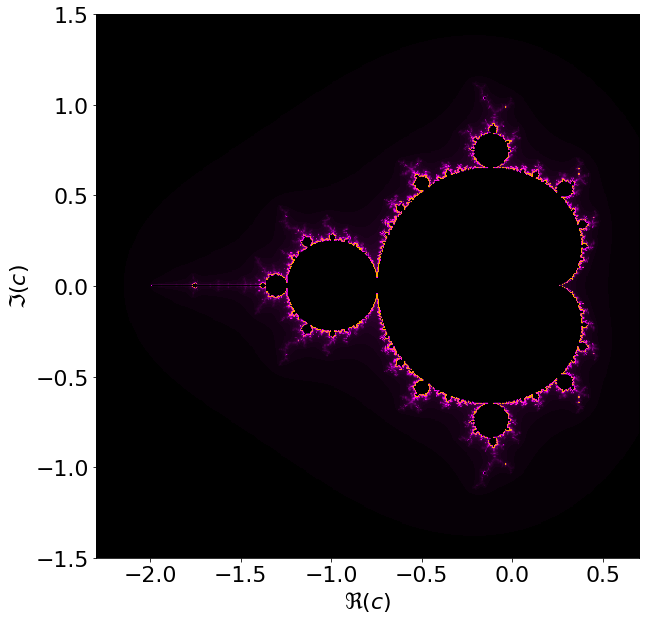

In [250]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
c0, c1 = cur_center - cur_extent / 2, cur_center + cur_extent / 2
plot_extent = (c0.real, c1.real, c0.imag, c1.imag)

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","magenta","orange","orange","orange","magenta","black"])
# cyan, lawngreen, white, magenta
ax.imshow(niters, origin='lower', extent=plot_extent, cmap=cmap)
ax.set_xlabel("$\Re(c)$")
ax.set_ylabel("$\Im(c)$")
# plt.show()
plt.savefig('figures/mandelbrot_test_final.svg', bbox_inches="tight")

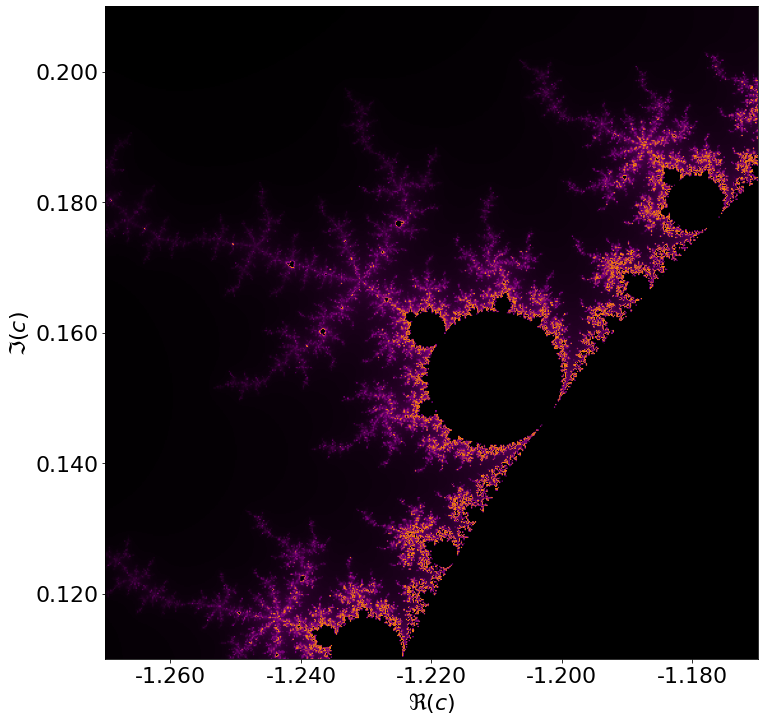

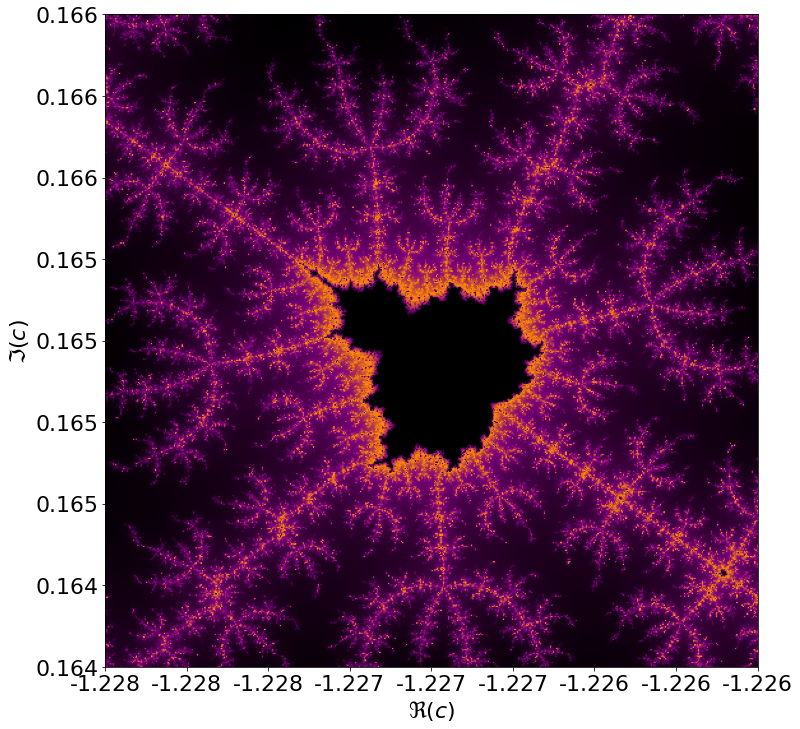

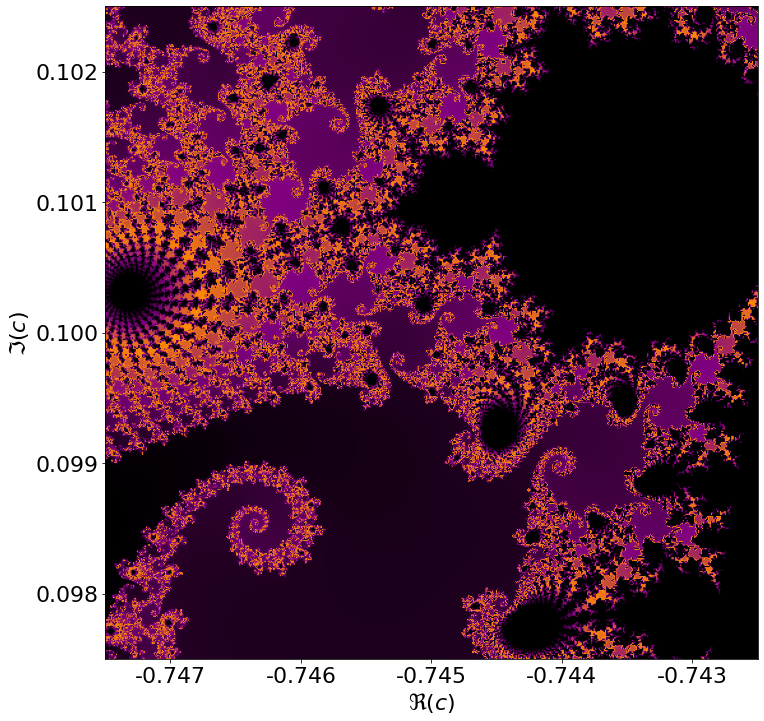

In [236]:


def draw_mandelbrot(cur_center, cur_extent,fname, resolution=256*2**2):
    cur_width = resolution  # (x axis); real numbers
    cur_height = resolution# (y axis); imaginary

    cur_max_iter = resolution # convergence test search depth

    niters = compute_mandelbrot() # 17 ms
    fig, ax = plt.subplots(1,1, figsize=(12,12))
    c0, c1 = cur_center - cur_extent / 2, cur_center + cur_extent / 2
    plot_extent = (c0.real, c1.real, c0.imag, c1.imag)

    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","purple","darkorange","purple","black"]) # cyan, lawngreen, white, magenta

    ax.imshow(niters, origin='lower', extent=plot_extent, cmap=cmap)
    ax.set_xlabel("$\Re(c)$")
    ax.set_ylabel("$\Im(c)$")
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    # plt.show()
    plt.savefig('figures/'+fname+'.svg', bbox_inches="tight")




# outline
cur_center = -1.22 + 0.16j
cur_extent = .1 + .1j
draw_mandelbrot(cur_center, cur_extent,fname="test")

# a small bit
cur_center = -1.227 + 0.165j
cur_extent = .002 + .002j
draw_mandelbrot(cur_center, cur_extent,fname="test")

cur_center = -.745 + 0.1j
cur_extent = .005 + .005j
draw_mandelbrot(cur_center, cur_extent,fname="test")


